# Imports

In [1]:
import os

from matplotlib import pyplot as plt
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

from src.models import VitNet
from src.utils import (
    get_data,
    get_device,
    get_truth_vs_predicted,
    load,
    loss,
    plot_image_and_prediction,
    predict_image,
    predict_patch,
    seed_everyting,
    test,
    train,
)

# Global parameters

In [2]:
patch_size = 64
img_dir = "data/images"
model_dir = "models"
patch_dir = "data/patches"
results_dir = "results"
gedi_dir = "data/gedi"
random_state = 42
batch_size = 16
num_workers = os.cpu_count()
learning_rate = 1e-4
epochs = 25
bins = list(range(0, 55, 5))
is_training = False
device = get_device()

seed_everyting(random_state)

Using mps device


# Create dataloaders

In [3]:
# Create dataloaders
train_dl, val_dl, test_dl = get_data(
    img_dir, patch_dir, gedi_dir, patch_size, batch_size, num_workers, bins
)

INFO:root:Starting preprocessing...
INFO:root:Directories validated.
INFO:root:Images loaded.
INFO:root:Number of images: 48
INFO:root:GEDI data loaded.
INFO:root:Loaded existing patch info file. Skipping image processing.
INFO:root:Number of patches: 101423
INFO:root:Number of labels: 629074


# Create & Train model

In [4]:
if is_training:
    model = VitNet(
        image_size=patch_size,
        hidden_size=patch_size * 4,
        intermediate_size=patch_size * 8,
    ).to(device)

    # Create optimizer
    optimizer = AdamW(model.parameters(), learning_rate)

    # Create scheduler
    scheduler = CosineAnnealingLR(optimizer, epochs)

    # Training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}\n-------------------------------")
        train(train_dl, model, loss, device, optimizer, scheduler)
        test(val_dl, model, loss, device)

    print("Training finished.")

    test(test_dl, model, loss, device)
else:
    model = load(
        os.path.join(model_dir, "vitnet", f"vitnet-{patch_size}-e{epochs}.pt"), device
    )

FileNotFoundError: [Errno 2] No such file or directory: 'models/vitnet/vitnet-v2-64.pt'

# Visualise results

In [ ]:
inputs, targets = next(iter(test_dl))

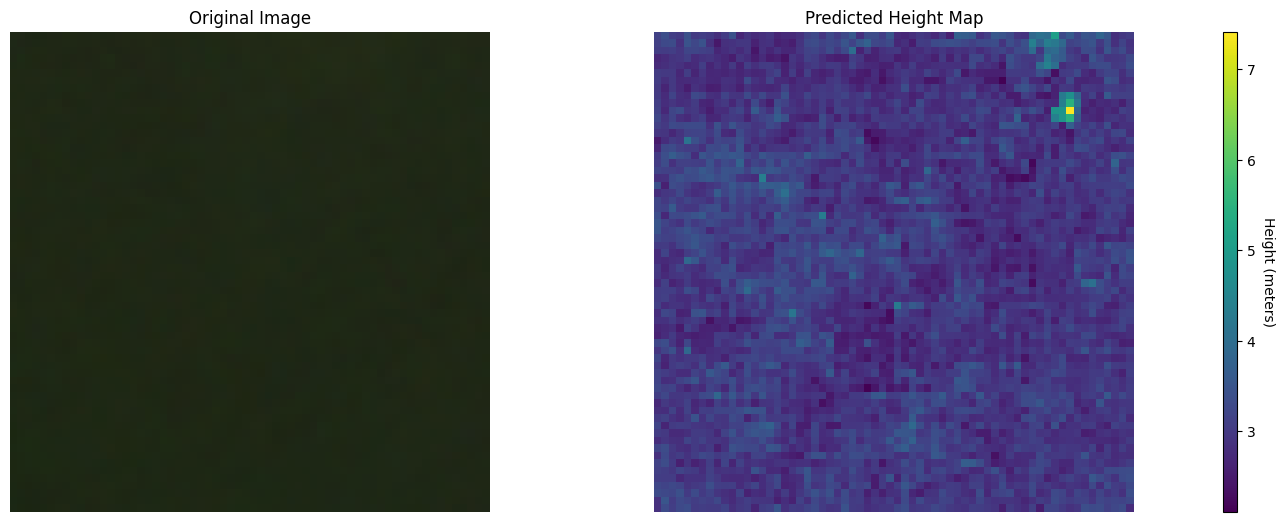

In [ ]:
idx = 4
patch = inputs[idx], None
img, pred = predict_patch(model, patch, device)
plot_image_and_prediction(img, pred, 3)

In [ ]:
image, prediction = predict_image(
    model, device, f"{img_dir}/L15-1059E-1348N.tif", patch_size
)

100%|██████████| 4096/4096 [02:13<00:00, 30.61it/s]


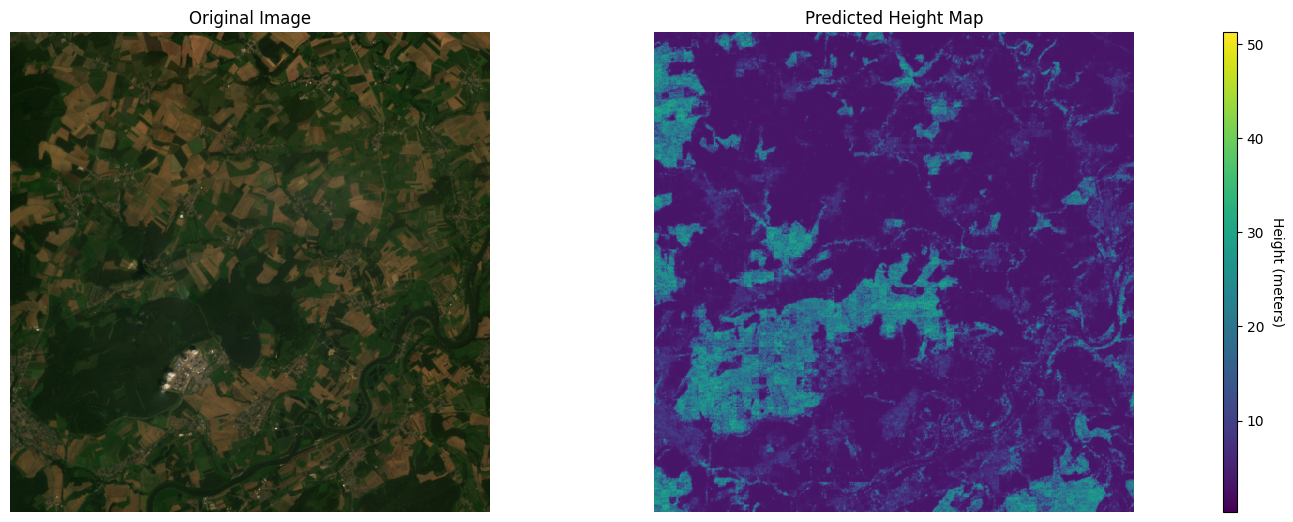

In [ ]:
plot_image_and_prediction(image, prediction, 3)

In [ ]:
truth, predicted = get_truth_vs_predicted(model, test_dl, device)

100%|██████████| 5072/5072 [15:35<00:00,  5.42it/s]


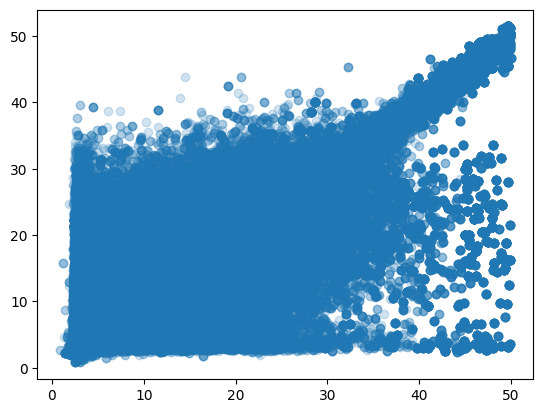

In [ ]:
mask = (truth > 0) & (truth < 50)

plt.scatter(truth[mask], predicted[mask], alpha=0.2)

(array([[5.523e+03, 5.010e+02, 8.200e+01, 4.400e+01, 3.500e+01, 1.100e+01,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.490e+02, 7.030e+02, 1.120e+02, 4.800e+01, 2.700e+01, 7.000e+00,
         5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [7.800e+01, 1.900e+02, 5.120e+02, 1.320e+02, 4.600e+01, 1.800e+01,
         3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [3.300e+01, 4.200e+01, 1.880e+02, 7.430e+02, 1.700e+02, 2.700e+01,
         7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [2.200e+01, 1.800e+01, 5.500e+01, 3.020e+02, 1.183e+03, 1.830e+02,
         1.700e+01, 1.000e+00, 0.000e+00, 0.000e+00],
        [9.000e+00, 6.000e+00, 1.200e+01, 4.300e+01, 2.380e+02, 5.390e+02,
         3.900e+01, 2.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 7.000e+00, 5.000e+01,
         1.080e+02, 5.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
         1.500e+01, 2.

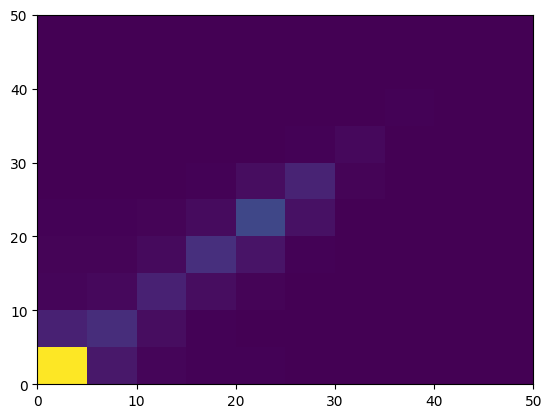

In [ ]:
plt.hist2d(truth[mask], predicted[mask], bins)